## Calculate hourly Q matrix kernels using a 3D conductivity model

Import packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import h5py

%matplotlib inline

In [12]:
h5f = h5py.File('kernels/Delta_hourly_kernels_3D_0p25deg_Grayver2017_WOA_gg.h5', 'r')
times_kernel = np.squeeze(h5f['times'][()])
theta_kernel = np.squeeze(h5f['theta'][()])
phi_kernel = np.squeeze(h5f['phi'][()])
theta_gm_kernel = np.squeeze(h5f['theta_gm'][()])
phi_gm_kernel = np.squeeze(h5f['phi_gm'][()])
acronyms_kernel = np.squeeze(h5f['acronyms'][()])
Bt_kernel = h5f['Bt_kernel'][()]
h5f.close()

h5f = h5py.File('kernels/Delta_hourly_kernels_1D_Grayver2017_gg.h5', 'r')
Bt_kernel_1D = h5f['Bt_kernel'][()]
h5f.close()

Text(0, 0.5, '$|B_{1,\\phi}^{0}|$ (nT)')

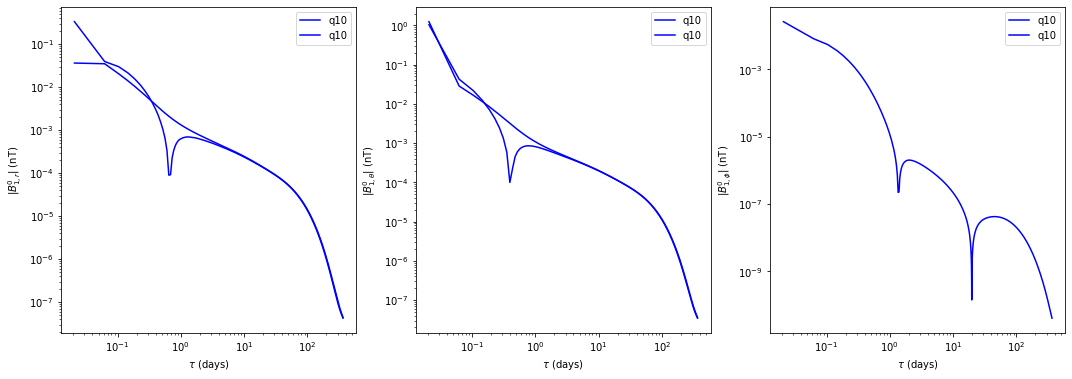

In [33]:
oidx = np.where(acronyms_kernel == b'GNA')[0][0]

cname = ('q10', 'q11', 's11', 'q20', 'q21', 's21', 'q22', 's22', 'q30', 'q31', 's31', 'q32', 's32', 'q33', 's33')
cidx = 0
                
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
ax1.loglog(times_kernel / (24 * 3600), abs(Bt_kernel[oidx, 0, :, cidx]), color='b', label=cname[cidx])
ax1.loglog(times_kernel / (24 * 3600), abs(Bt_kernel_1D[oidx, 0, :, cidx]), color='b', label=cname[cidx])

ax1.legend()
plt.xlabel(r'$\tau$ (days)')
plt.ylabel(r'$|B_{1,r}^{0}|$ (nT)')
ax1 = fig.add_subplot(1,3,2)
ax1.loglog(times_kernel / (24 * 3600), abs(Bt_kernel[oidx, 1, :, cidx]), color='b', label=cname[cidx])
ax1.loglog(times_kernel / (24 * 3600), abs(Bt_kernel_1D[oidx, 1, :, cidx]), color='b', label=cname[cidx])
ax1.legend()
plt.xlabel(r'$\tau$ (days)')
plt.ylabel(r'$|B_{1,\theta}^{0}|$ (nT)')
ax1 = fig.add_subplot(1,3,3)
ax1.loglog(times_kernel / (24 * 3600), abs(Bt_kernel[oidx, 2, :, cidx]), color='b', label=cname[cidx])
ax1.loglog(times_kernel / (24 * 3600), abs(Bt_kernel_1D[oidx, 2, :, cidx]), color='b', label=cname[cidx])
ax1.legend()
plt.xlabel(r'$\tau$ (days)')
plt.ylabel(r'$|B_{1,\phi}^{0}|$ (nT)')

Save kernels into an HDF5 file

In [9]:
h5f = h5py.File('Delta_hourly_kernels_3D_0p25deg_Grayver2017_WOA_gm.h5', 'w')
h5f.create_dataset('omega', data=omega)
h5f.create_dataset('filter_name', data=filter_name)
h5f.create_dataset('times', data=q_step_times)
h5f.create_dataset('theta_gm', data=theta_obs_gm)
h5f.create_dataset('phi_gm', data=phi_obs_gm)
h5f.create_dataset('theta', data=theta_obs_gc)
h5f.create_dataset('phi', data=phi_obs_gc)
h5f.create_dataset('acronyms', data=acronyms, dtype='S3')
h5f.create_dataset('Bt_kernel', data=Bt_kernel, compression='gzip', compression_opts=6)
h5f.close()

In [10]:
print(Bt_kernel[oidx,0,:6,4])
print(Bt_kernel[oidx,0,:6,5])

[-0.31036336 -0.0880287  -0.05179646 -0.03613979 -0.02723492 -0.02154506]
[-0.1659077  -0.04679434 -0.02812812 -0.02000314 -0.01534949 -0.01233439]


In [11]:
print(Bt_kernel[oidx,1,:6,4])
print(Bt_kernel[oidx,1,:6,5])

[-0.96966743  0.02105676  0.01259772  0.0090064   0.00698103  0.00567572]
[-0.53929263  0.01246633  0.00775987  0.0056374   0.00436611  0.00351559]


In [12]:
print(Bt_kernel[oidx,2,:6,4])
print(Bt_kernel[oidx,2,:6,5])

[ 0.65359454 -0.01935699 -0.00844867 -0.00497796 -0.00339797 -0.00256651]
[-1.19349544  0.03128496  0.01489967  0.00967952  0.00718103  0.00575536]


In [13]:
plus_idx = linear_index((2, 1))
minus_idx = linear_index((2, -1))
print((Bnm_f_ext[plus_idx, :, oidx] + Bnm_f_ext[minus_idx, :, oidx]) / 2)
print((Bnm_f_ext[plus_idx, :, oidx] - Bnm_f_ext[minus_idx, :, oidx]) / 2j)

[-1.36768796+0.j -0.65476253+0.j  0.44617444+0.j]
[-0.75502546-0.j -0.36145846-0.j -0.80822098-0.j]
